# Linear Regression Analysis on Housing Dataset

This notebook demonstrates a complete linear regression workflow using scikit-learn:
- **Data Preparation**: Load and explore the housing dataset
- **Train-Test Split**: Divide data into 80% training and 20% testing sets
- **Model Training**: Train a linear regression model using Ordinary Least Squares
- **Evaluation**: Assess performance using MSE and R² metrics
- **Interpretation**: Analyze feature coefficients and their impact on home prices

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Data Preparation

Load the housing dataset and identify features and target variable. We'll examine the data structure and basic statistics.

In [2]:
# Load the housing dataset
df = pd.read_csv('housing.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}, Number of features: {df.shape[1] - 1}")

# Display basic statistics
print("\nBasic statistics:")
print(df.describe())

First few rows of the dataset:
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

Dataset shape: (489, 4)
Number of samples: 489, Number of features: 3

Basic statistics:
               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [3]:
# Identify features (X) and target (y)
X = df[['RM', 'LSTAT', 'PTRATIO']]  # Features
y = df['MEDV']  # Target variable (median home value)

print("Features (X):")
print(X.head())
print(f"\nTarget (y):")
print(y.head())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features (X):
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7

Target (y):
0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

Features shape: (489, 3)
Target shape: (489,)


## Step 2: Train-Test Split

Split the data into training (80%) and testing (20%) sets. We use a fixed random state for reproducibility.

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training set size: 391 samples (80.0%)
Testing set size: 98 samples (20.0%)

Training features shape: (391, 3)
Testing features shape: (98, 3)
Training target shape: (391,)
Testing target shape: (98,)


## Step 3: Model Training

Train a Linear Regression model using the training data. The `.fit()` method uses Ordinary Least Squares (OLS) to calculate optimal coefficients.

In [5]:
# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


## Step 4: Model Evaluation

Generate predictions on the test set and evaluate the model using Mean Squared Error (MSE) and R² score.

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"\nInterpretation: The model explains {r2*100:.2f}% of the variance in Home Prices.")

Model Evaluation Metrics:
Mean Squared Error (MSE): 6789025559.2659
Root Mean Squared Error (RMSE): 82395.5433
R² Score: 0.6911

Interpretation: The model explains 69.11% of the variance in Home Prices.


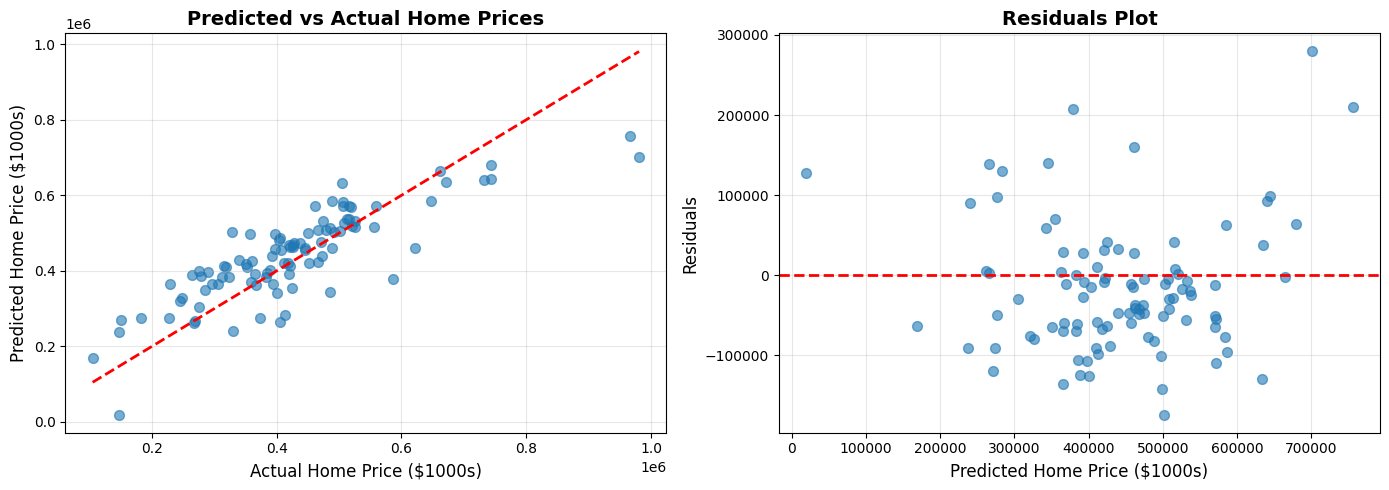

In [7]:
# Visualize predicted vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Home Price ($1000s)', fontsize=12)
axes[0].set_ylabel('Predicted Home Price ($1000s)', fontsize=12)
axes[0].set_title('Predicted vs Actual Home Prices', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Residuals plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, s=50)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Home Price ($1000s)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Coefficient Interpretation

Extract and interpret the model's intercept and coefficients to understand how each housing feature impacts home price predictions.

In [8]:
# Extract intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
feature_names = X.columns

print("Linear Regression Equation:")
print("=" * 60)
print(f"Home Price = {intercept:.4f}", end="")
for name, coef in zip(feature_names, coefficients):
    sign = "+" if coef >= 0 else "-"
    print(f" {sign} {abs(coef):.4f} × {name}", end="")
print("\n" + "=" * 60)

print("\nCoefficient Interpretation:")
print("-" * 60)
print(f"Intercept (Base Price): ${intercept*1000:.2f}")
print("\nFeature Coefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"  {name:12s}: {coef:8.4f} (impact in $1000s)")
    if name == 'RM':
        print(f"               → Each additional room: ${coef*1000:.2f}")
    elif name == 'LSTAT':
        print(f"               → 1% increase in lower status: ${coef*1000:.2f}")
    elif name == 'PTRATIO':
        print(f"               → 1 point increase in ratio: ${coef*1000:.2f}")
    print()

Linear Regression Equation:
Home Price = 408027.6542 + 87322.2036 × RM - 10620.6373 × LSTAT - 19324.4103 × PTRATIO

Coefficient Interpretation:
------------------------------------------------------------
Intercept (Base Price): $408027654.17

Feature Coefficients:
  RM          : 87322.2036 (impact in $1000s)
               → Each additional room: $87322203.62

  LSTAT       : -10620.6373 (impact in $1000s)
               → 1% increase in lower status: $-10620637.32

  PTRATIO     : -19324.4103 (impact in $1000s)
               → 1 point increase in ratio: $-19324410.30



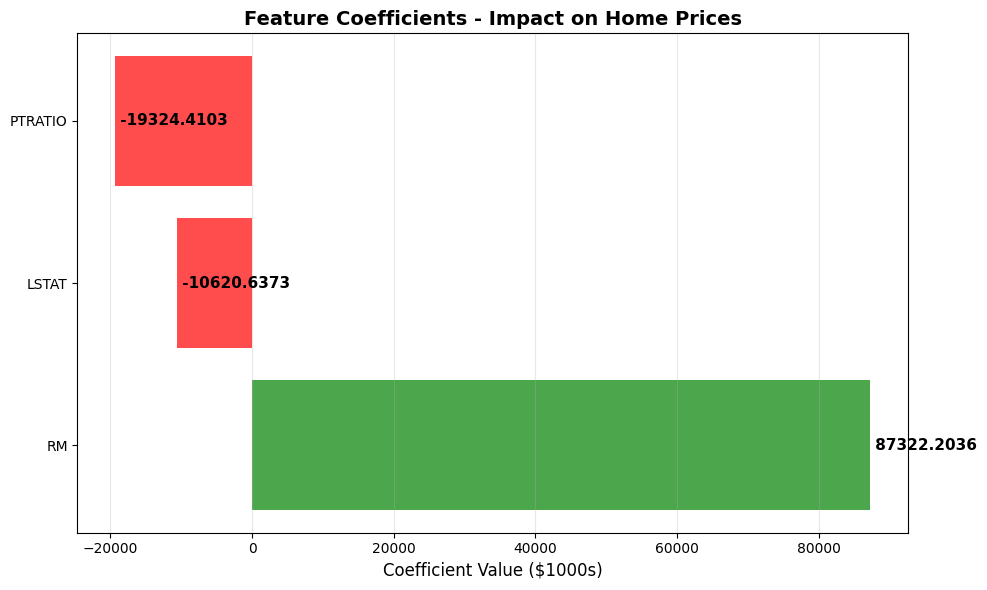


Key Insights:
------------------------------------------------------------
1. RM: Coefficient = 87322.2036
   Each additional room increases home value by $87322203.62
2. PTRATIO: Coefficient = -19324.4103
   1 point increase in pupil-teacher ratio changes value by $-19324410.30
3. LSTAT: Coefficient = -10620.6373
   1% increase in lower status decreases home value by $10620637.32


In [9]:
# Visualize coefficient importance
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green' if coef > 0 else 'red' for coef in coefficients]
bars = ax.barh(feature_names, coefficients, color=colors, alpha=0.7)

ax.set_xlabel('Coefficient Value ($1000s)', fontsize=12)
ax.set_title('Feature Coefficients - Impact on Home Prices', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (name, coef) in enumerate(zip(feature_names, coefficients)):
    ax.text(coef, i, f' {coef:.4f}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("-" * 60)
sorted_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
for i, (name, coef) in enumerate(sorted_features, 1):
    print(f"{i}. {name}: Coefficient = {coef:.4f}")
    if name == 'RM':
        print(f"   Each additional room increases home value by ${coef*1000:.2f}")
    elif name == 'LSTAT':
        print(f"   1% increase in lower status decreases home value by ${abs(coef)*1000:.2f}")
    elif name == 'PTRATIO':
        print(f"   1 point increase in pupil-teacher ratio changes value by ${coef*1000:.2f}")